In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.autograd import Variable

In [2]:
D_in, H, D_out = 1, 50, 1

In [3]:
#xtrain = torch.rand(N, D_in)
xtrain = torch.range(0, 1, 0.1).view(-1, 1)
xtrain = torch.cat((xtrain, torch.Tensor([2]).view(-1, 1)))
ytrain = torch.exp(xtrain)
N = len(xtrain)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.3. Note that arange generates values in [start; end), not [start; end].
  


In [4]:
xtrain


 0.0000
 0.1000
 0.2000
 0.3000
 0.4000
 0.5000
 0.6000
 0.7000
 0.8000
 0.9000
 1.0000
 2.0000
[torch.FloatTensor of size 12x1]

In [5]:
x = Variable(xtrain)
y = Variable(ytrain, requires_grad=False)

In [6]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    #torch.nn.LogSigmoid(),
    torch.nn.Linear(H, D_out),
    
)

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

In [7]:
for t in range(5000):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [8]:
xtest = Variable(torch.rand(1000, D_in)*2)
ytest = torch.exp(xtest)

In [9]:
ytest_pred = model(xtest)

In [10]:
ytest_pred

Variable containing:
 1.2131
 1.7277
 6.1860
   ⋮    
 6.9856
 7.1279
 2.9458
[torch.FloatTensor of size 1000x1]

12


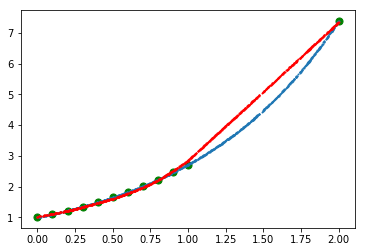

In [11]:
plt.scatter(x.data.numpy(), y.data.numpy(), c='g', s=50)
print(len(x.data.numpy()))
plt.scatter(xtest.data.numpy(), ytest.data.numpy(), s=1)
plt.scatter(xtest.data.numpy(), ytest_pred.data.numpy(), c='r', s=1)

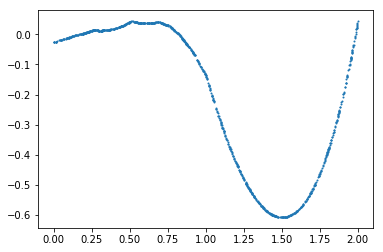

In [12]:
plt.scatter(xtest.data.numpy(), (ytest-ytest_pred).data.numpy(), s=1)

In [27]:
def naive(xtrain, ytrain, xtest):
    ytest = []
    for x in xtest:
        for i, xt in enumerate(xtrain):
            print(x, xt.numpy()[0])
            if x < xt.numpy()[0]:
                ytest.append(ytrain[i-1] + (ytrain[i]-ytrain[i-1])*(x-xtrain[i-1])/(xtrain[i]-xtrain[i-1]))
    return ytest

In [28]:
ytest_naive = naive(xtrain, ytrain, xtest)

Variable containing:
 0.1964
[torch.FloatTensor of size 1]
 0.0


RuntimeError: lt() received an invalid combination of arguments - got (numpy.float32), but expected one of:
 * (float other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.float32[0m)
 * (Variable other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.float32[0m)
